# Costa Rica Poverty Prediction

In [26]:
# %pip install 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Exploratory analysis

In [28]:
df = pd.read_csv('train.csv')
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [29]:
# get dependency column from sq dependency
# print(sorted(df['dependency'].unique()))
# df['dependency'].value_counts()
# df['SQBdependency'].value_counts()
df['dependency'] = [np.sqrt(x) for x in df['SQBdependency']]

# clean out strings from numeric education
for col in ['edjefe','edjefa']:
    df.loc[df[col]=='yes',col] = np.nan
    df.loc[df[col]=='no',col] = 0
    df[col] = [float(x) for x in df[col]]

# look at unique values
cols = df.columns[73:].tolist()
for col in cols:
    vals = sorted(df[col].unique())[:5]
    vals.append(vals[-1])
    print(f"{col}: {set(vals)}")

dis: {0, 1}
male: {0, 1}
female: {0, 1}
estadocivil1: {0, 1}
estadocivil2: {0, 1}
estadocivil3: {0, 1}
estadocivil4: {0, 1}
estadocivil5: {0, 1}
estadocivil6: {0, 1}
estadocivil7: {0, 1}
parentesco1: {0, 1}
parentesco2: {0, 1}
parentesco3: {0, 1}
parentesco4: {0, 1}
parentesco5: {0, 1}
parentesco6: {0, 1}
parentesco7: {0, 1}
parentesco8: {0, 1}
parentesco9: {0, 1}
parentesco10: {0, 1}
parentesco11: {0, 1}
parentesco12: {0, 1}
idhogar: {'001ff74ca', '004616164', '005905417', '003123ec2', '004983866'}
hogar_nin: {0, 1, 2, 3, 4}
hogar_adul: {0, 1, 2, 3, 4}
hogar_mayor: {0, 1, 2, 3}
hogar_total: {1, 2, 3, 4, 5}
dependency: {0.0, 0.16666667333333318, 0.2222222221111109, 0.20000000749999985, 0.25}
edjefe: {0.0, 2.0, 3.0, 4.0, 5.0}
edjefa: {0.0, 2.0, 3.0, 4.0, 5.0}
meaneduc: {0.0, 1.5, 2.3333333, 2.6666667, 3.3333333}
instlevel1: {0, 1}
instlevel2: {0, 1}
instlevel3: {0, 1}
instlevel4: {0, 1}
instlevel5: {0, 1}
instlevel6: {0, 1}
instlevel7: {0, 1}
instlevel8: {0, 1}
instlevel9: {0, 1}
bedroo

In [30]:
pd.set_option('display.max_rows', 500)

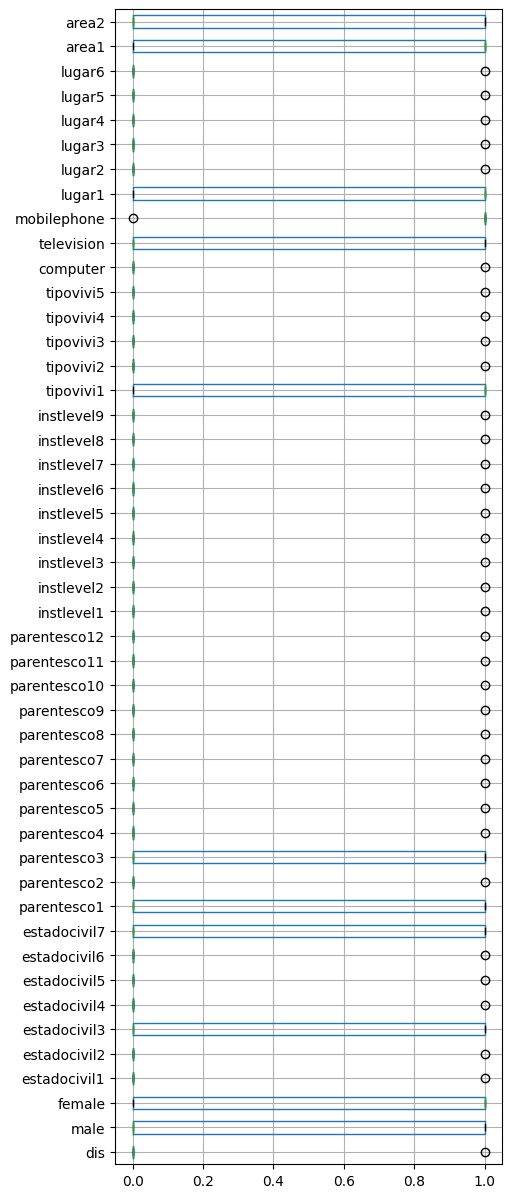

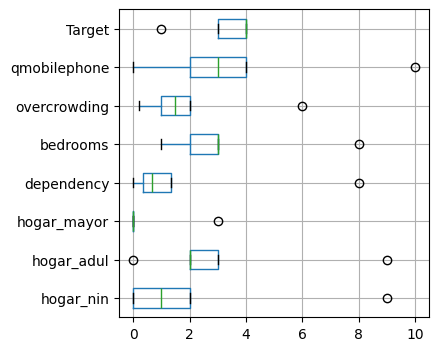

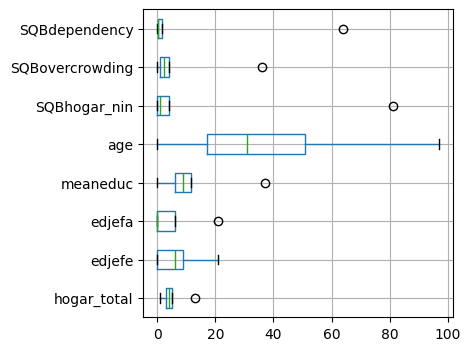

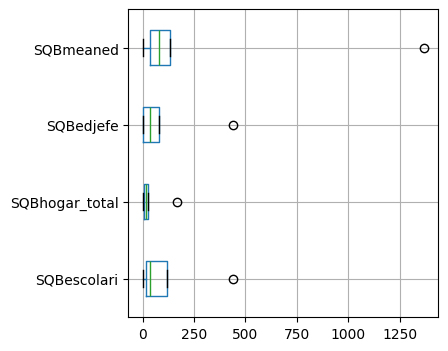

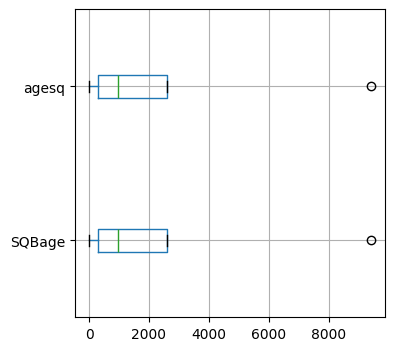

In [31]:
df2 = df.iloc[:,73:]
df2 = df2[[x for x in df2.columns if not isinstance(df2.loc[0,x],str)]]
for m in [1,10,100,5000,10000]:
    if m==1:
        fsize=(5,15)
    else:
        fsize=(4,4)
    plt.figure(figsize=fsize)
    summary = df2[[x for x in df2.columns if max(df2[x])<=m]].describe()
    df2 = df2[[x for x in df2.columns if max(df2[x])>m]]
    summary = summary.T[['min','25%','50%','75%','max']].T
    summary.boxplot(vert=False)
    plt.show()

In [32]:
# calculate percentages
for col in df[cols].columns:
    print(df[col].value_counts(normalize=True).reset_index()[:5])

   dis  proportion
0    0    0.942451
1    1    0.057549
   male  proportion
0     0    0.516585
1     1    0.483415
   female  proportion
0       1    0.516585
1       0    0.483415
   estadocivil1  proportion
0             0    0.862195
1             1    0.137805
   estadocivil2  proportion
0             0     0.87674
1             1     0.12326
   estadocivil3  proportion
0             0     0.73161
1             1     0.26839
   estadocivil4  proportion
0             0    0.968086
1             1    0.031914
   estadocivil5  proportion
0             0    0.937219
1             1    0.062781
   estadocivil6  proportion
0             0    0.966831
1             1    0.033169
   estadocivil7  proportion
0             0    0.657319
1             1    0.342681
   parentesco1  proportion
0            0    0.688919
1            1    0.311081
   parentesco2  proportion
0            0    0.815946
1            1    0.184054
   parentesco3  proportion
0            0    0.618186
1            

In [33]:
# calculate missing
for col in df[cols].columns:
    n = sum(df[col].isnull())
    if n>0:
        print(f"{col}: {n} {round(n/len(df),3)}")

edjefe: 123 0.013
edjefa: 69 0.007
meaneduc: 5 0.001
SQBmeaned: 5 0.001


In [48]:
df.to_csv('cleaned.csv',index=None)

## Preprocessing by imputing NaN

In [ ]:
df = pd.read_csv('cleaned.csv')

In [ ]:
train, test = train_test_split(df.drop(columns=['Id','idhogar']), test_size = .3)
valid, test = train_test_split(test, test_size = .1)

In [ ]:
X_train = train.drop(columns='Target')
y_train = train['Target']
X_valid = valid.drop(columns='Target')
y_valid = valid['Target']
X_test = test.drop(columns='Target')
y_test = test['Target']

In [100]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=imputer.get_feature_names_out())
X_valid = pd.DataFrame(imputer.fit_transform(X_valid), columns=imputer.get_feature_names_out())

## Tuning: NN Classifier

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [10]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'id

In [101]:
def evaluate(y, scores):
    fpr, tpr, _ = metrics.roc_curve(y, scores, pos_label=1)
    return metrics.auc(fpr, tpr)

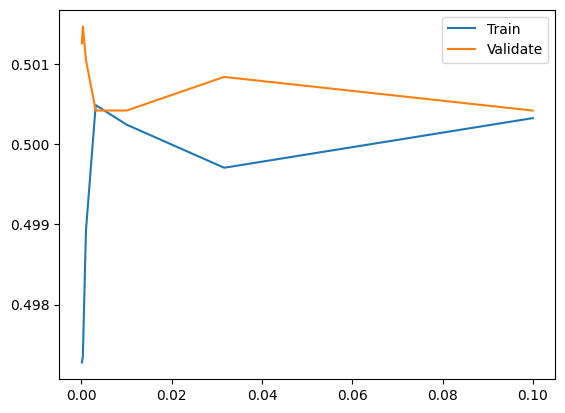

In [140]:
alphas = np.power(10.0,np.arange(-4,-.5,.5))
train_scores = []
valid_scores = []

for alpha in alphas:
    mlp = MLPClassifier(solver='sgd',alpha=alpha)
    mlp.fit(X_train,y_train)

    train_scores.append(evaluate(y_train, mlp.predict(X_train)))
    valid_scores.append(evaluate(y_valid, mlp.predict(X_valid)))

fig,ax = plt.subplots()
ax.plot(alphas,train_scores,label='Train')
ax.plot(alphas,valid_scores,label='Validate')
ax.legend()

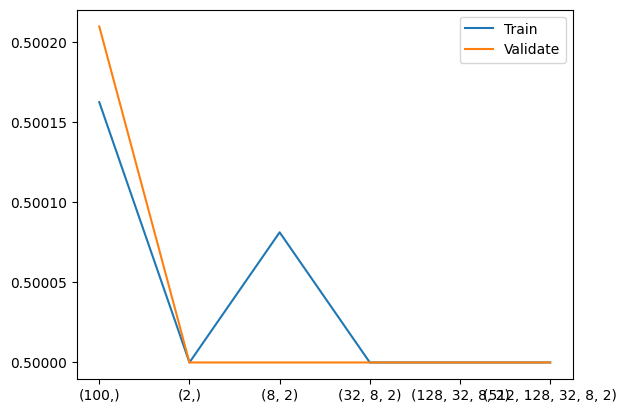

In [141]:
sizes = [(100,)]
for i in range(0,5,1):
    layers = []
    for n in range(1,10,2):
        layers.append(np.power(2,n))
    sizes.append(tuple(layers[i::-1]))
sizes
train_scores = []
valid_scores = []

for size in sizes:
    mlp = MLPClassifier(solver='sgd',hidden_layer_sizes=size)
    mlp.fit(X_train,y_train)

    train_scores.append(evaluate(y_train, mlp.predict(X_train)))
    valid_scores.append(evaluate(y_valid, mlp.predict(X_valid)))

fig,ax = plt.subplots()
ax.plot([str(x) for x in sizes],train_scores,label='Train')
ax.plot([str(x) for x in sizes],valid_scores,label='Validate')
ax.legend()

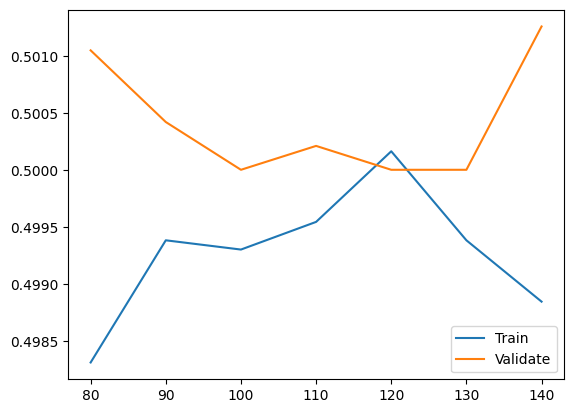

In [155]:
sizes = np.arange(80,150,10)
train_scores = []
valid_scores = []

for size in sizes:
    mlp = MLPClassifier(solver='sgd',hidden_layer_sizes=(size,))
    mlp.fit(X_train,y_train)

    train_scores.append(evaluate(y_train, mlp.predict(X_train)))
    valid_scores.append(evaluate(y_valid, mlp.predict(X_valid)))

fig,ax = plt.subplots()
ax.plot(sizes,train_scores,label='Train')
ax.plot(sizes,valid_scores,label='Validate')
ax.legend()

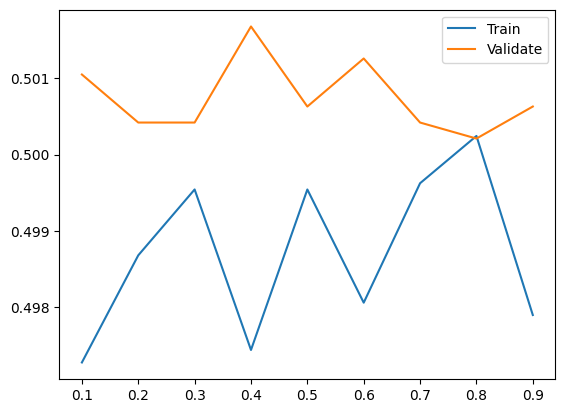

In [145]:
momentums = np.arange(.1,1,.1)
train_scores = []
valid_scores = []

for momentum in momentums:
    mlp = MLPClassifier(solver='sgd',momentum=momentum)
    mlp.fit(X_train,y_train)

    train_scores.append(evaluate(y_train, mlp.predict(X_train)))
    valid_scores.append(evaluate(y_valid, mlp.predict(X_valid)))

fig,ax = plt.subplots()
ax.plot(momentums,train_scores,label='Train')
ax.plot(momentums,valid_scores,label='Validate')
ax.legend()

## Tuning: Ensemble

In [7]:
from sklearn.ensemble import VotingRegressor

## Score

In [89]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, scores, pos_label=1)
metrics.auc(fpr, tpr)



ValueError: Found input variables with inconsistent numbers of samples: [6689, 6]